# Zadanie nr 1:
Klasteryzacja
* 1.1. Wykorzystując generator danych z sklearn'a(https://machinelearningmastery.com/generate-test-datasets-python-scikit-    learn/) stworzyć pięć różnych zbiorów.
* 1.2. Przeprowadzić klasteryzację GMM i KMeans.
* 1.3. Wyniki przedstawić na wykresach

## 1 zbiór

In [1]:
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs, make_biclusters, make_circles, make_moons, make_gaussian_quantiles
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import seaborn as sb


Text(0.5, 1.0, 'Generated Data blobs, n_blobs 5')

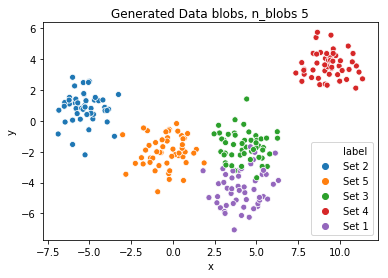

In [2]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=250, centers=5, n_features=2, random_state=123)
y_names = ["Set "+str(i+1) for i in y]

df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y_names))

#fig, ax = plt.subplots()
#grouped = df.groupby('label')
#for key, group in grouped:
    #group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=data_sety[key])
#plt.show()
#df.columns

sb.scatterplot(x="x", y="y", data=df[["x", "y"]], hue = df["label"])
plt.title("Generated Data blobs, n_blobs {:0.0f}".format(len(set(y_names))))


5
Best ADS: 0.90 for 5 number of clusters


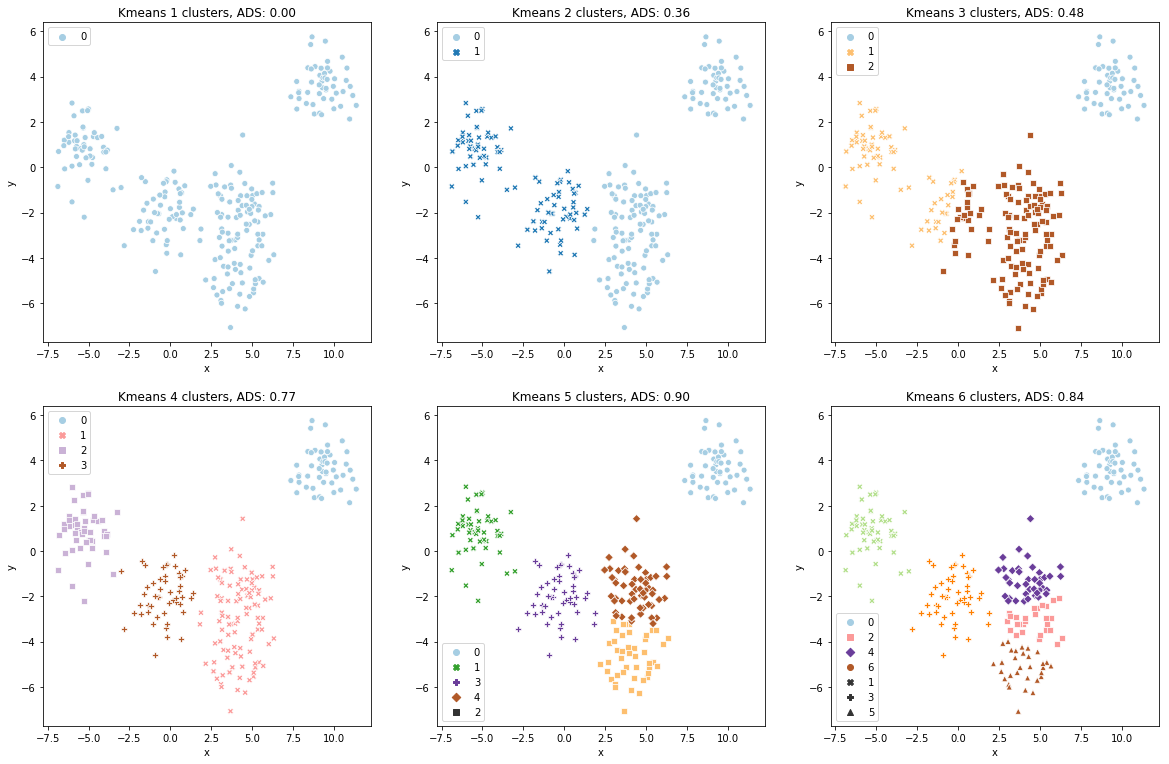

In [3]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
import numpy as np


df_data = df[["x", "y"]]
df_target = df["label"]
lengh = len(set(df_target))
print(lengh)
best_adi = 0

plt.figure(figsize=(20,20))
for i in range(1,lengh+2):
    kmean_cluster = KMeans(n_clusters=i, random_state=2)
    kmean_cluster.fit(df_data)
    km_target = kmean_cluster.predict(df_data)
    score_ads = adjusted_rand_score(df_target, km_target)
    comp_list = ["Cluster "+str(i) for i in range(1,i)]
    plt.subplot(3,int((lengh/2)+1),i)
    #plt.scatter(df_data["x"], df_data["y"], label=comp_list, color = colors[i-1])
    sb.scatterplot(x="x", y="y", data=df_data, hue=km_target, palette="Paired", style=km_target)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Kmeans {:0.0f} clusters, ADS: {:0.2f}".format(i, score_ads))
    if score_ads>best_adi:
        best_adi=score_ads
        n_clust = i
print("Best ADS: {:0.2f} for {:0.0f} number of clusters".format(best_adi, n_clust))


Best ADS: 0.89 for 5 number of clusters


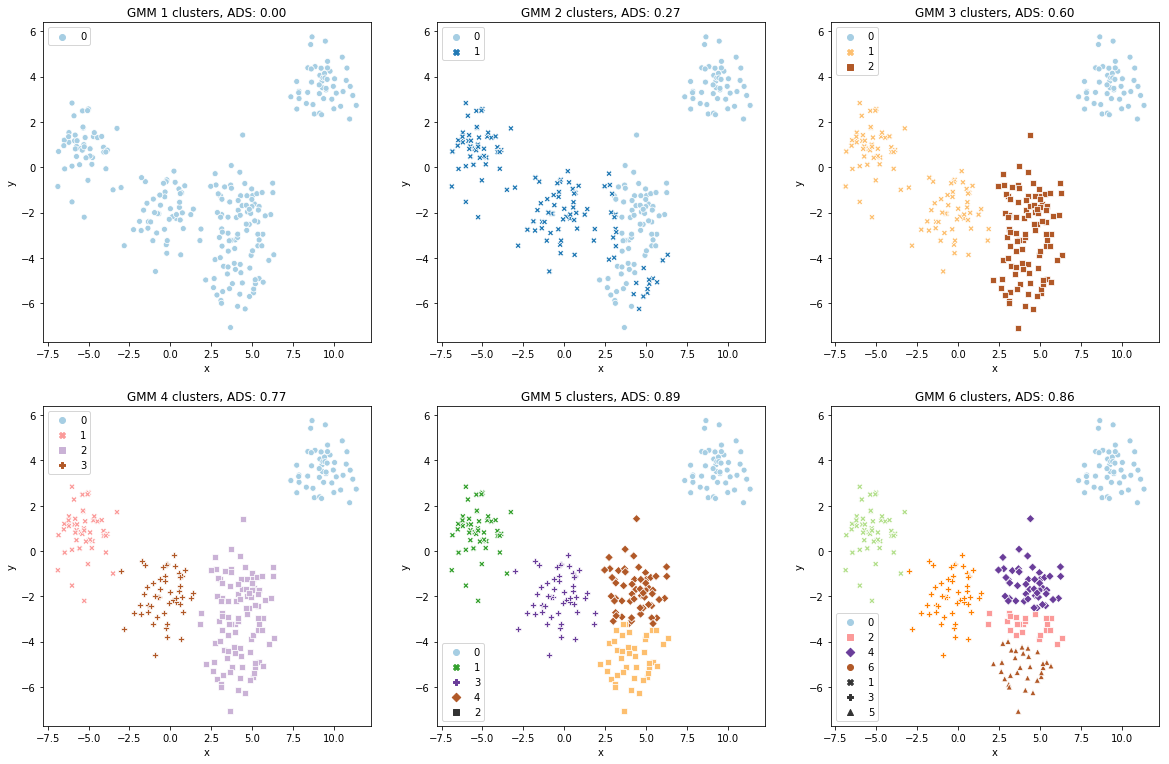

In [4]:
plt.figure(figsize=(20,20))

best_adi_gaus = 0

for i in range(1,lengh+2):
    kmean_cluster = GaussianMixture(n_components=i, random_state=2)
    kmean_cluster.fit(df_data)
    km_target = kmean_cluster.predict(df_data)
    score_ads = adjusted_rand_score(df_target, km_target)
    comp_list = ["Cluster "+str(i) for i in range(1,i)]
    plt.subplot(3,int((lengh/2)+1),i)
    #plt.scatter(df_data["x"], df_data["y"], label=comp_list, color = colors[i-1])
    sb.scatterplot(x="x", y="y", data=df_data, hue=km_target, palette="Paired", style=km_target)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("GMM {:0.0f} clusters, ADS: {:0.2f}".format(i, score_ads))
    if score_ads>best_adi_gaus:
        best_adi_gaus=score_ads
        n_clust_gaus = i
print("Best ADS: {:0.2f} for {:0.0f} number of clusters".format(best_adi_gaus, n_clust_gaus))

## 2 zbiór

Text(0.5, 1.0, 'Generated Data blobs, n_blobs 5')

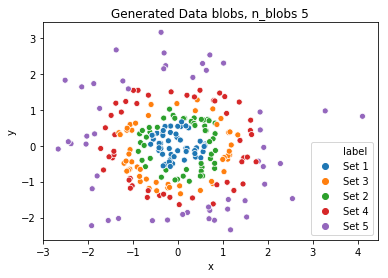

In [5]:
X, y = make_gaussian_quantiles(n_samples=250, n_features=2, random_state=2, n_classes=5)
y_names = ["Set "+str(i+1) for i in y]

df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y_names))

#fig, ax = plt.subplots()
#grouped = df.groupby('label')
#for key, group in grouped:
    #group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=data_sety[key])
#plt.show()
#df.columns

sb.scatterplot(x="x", y="y", data=df[["x", "y"]], hue = df["label"])
plt.title("Generated Data blobs, n_blobs {:0.0f}".format(len(set(y_names))))

5
Best ADS: 0.24 for 6 number of clusters


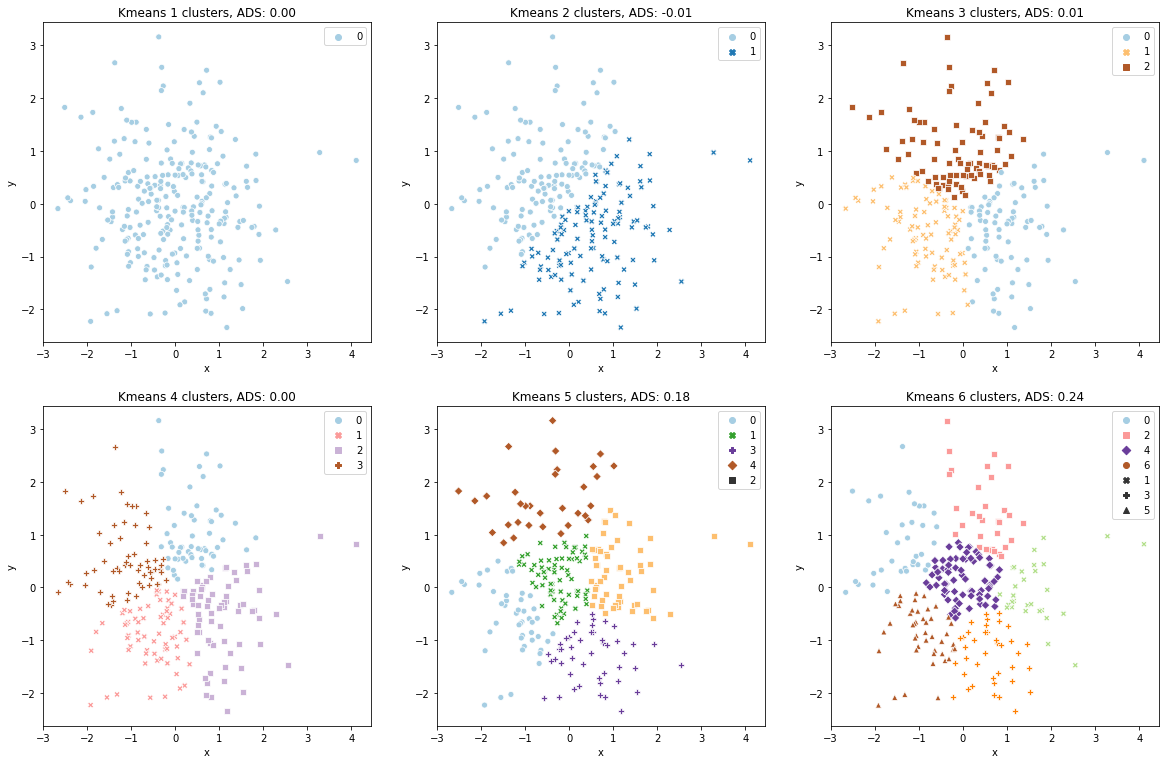

In [6]:
df_data = df[["x", "y"]]
df_target = df["label"]
lengh = len(set(df_target))
print(lengh)
best_adi = 0

plt.figure(figsize=(20,20))
for i in range(1,lengh+2):
    kmean_cluster = KMeans(n_clusters=i, random_state=2)
    kmean_cluster.fit(df_data)
    km_target = kmean_cluster.predict(df_data)
    score_ads = adjusted_rand_score(df_target, km_target)
    comp_list = ["Cluster "+str(i) for i in range(1,i)]
    plt.subplot(3,int((lengh/2)+1),i)
    #plt.scatter(df_data["x"], df_data["y"], label=comp_list, color = colors[i-1])
    sb.scatterplot(x="x", y="y", data=df_data, hue=km_target, palette="Paired", style=km_target)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Kmeans {:0.0f} clusters, ADS: {:0.2f}".format(i, score_ads))
    if score_ads>best_adi:
        best_adi=score_ads
        n_clust = i
print("Best ADS: {:0.2f} for {:0.0f} number of clusters".format(best_adi, n_clust))

5


E:\Anaconda Python\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
E:\Anaconda Python\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
E:\Anaconda Python\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

Best ADS: 0.24 for 6 number of clusters


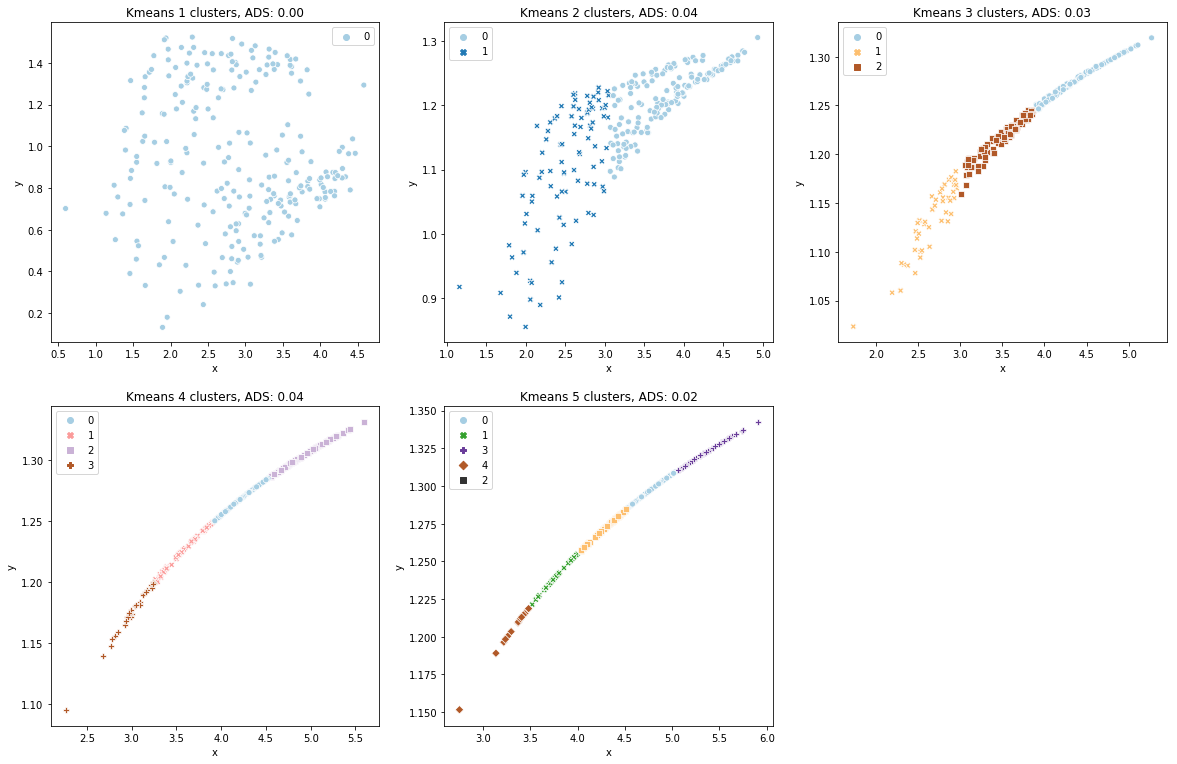

In [7]:
class Radial_transformer(BaseEstimator, TransformerMixin):
    def __init__(self, atrib_names):
        self.atribute_names = atrib_names
        self.r_list = []
        self.t_list = []
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=0):
        self.x, self.y = X.iloc[:,0] , X.iloc[:,1]
        self.r = np.sqrt(self.x**2+self.y**2)
        self.t = np.arctan2(self.x, self.y)
        X.iloc[:,0] = self.r
        X.iloc[:,1] = self.t
        return X.values

lengh = len(set(df_target))
print(lengh)    
    
model = Pipeline([
    ("transformer", Radial_transformer(df_data.columns)),
    ("Knn", KMeans(n_clusters = len(set(df_target)), random_state=2))
])
model.fit(df_data)

plt.figure(figsize=(20,20))
for i in range(1,lengh+1):
    kmean_cluster = Pipeline([
                    ("transformer", Radial_transformer(df_data.columns)),
                    ("Knn", KMeans(n_clusters =i, random_state=2))
    ])
    kmean_cluster.fit_transform(df_data)
    km_target = kmean_cluster.predict(df_data)
    score_ads = adjusted_rand_score(df_target, km_target)
    comp_list = ["Cluster "+str(i) for i in range(1,i)]
    plt.subplot(3,int((lengh/2)+1),i)
    #plt.scatter(df_data["x"], df_data["y"], label=comp_list, color = colors[i-1])
    sb.scatterplot(x="x", y="y", data=df_data, hue=km_target, palette="Paired", style=km_target)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Kmeans {:0.0f} clusters, ADS: {:0.2f}".format(i, score_ads))
    if score_ads>best_adi:
        best_adi=score_ads
        n_clust = i
print("Best ADS: {:0.2f} for {:0.0f} number of clusters".format(best_adi, n_clust))


#x,y = df_data["x"], df_data["y"]
#r = np.sqrt(x**2+y**2)
#t = np.arctan2(y, x)

#print(x,y)

Best ADS: 0.04 for 5 number of clusters


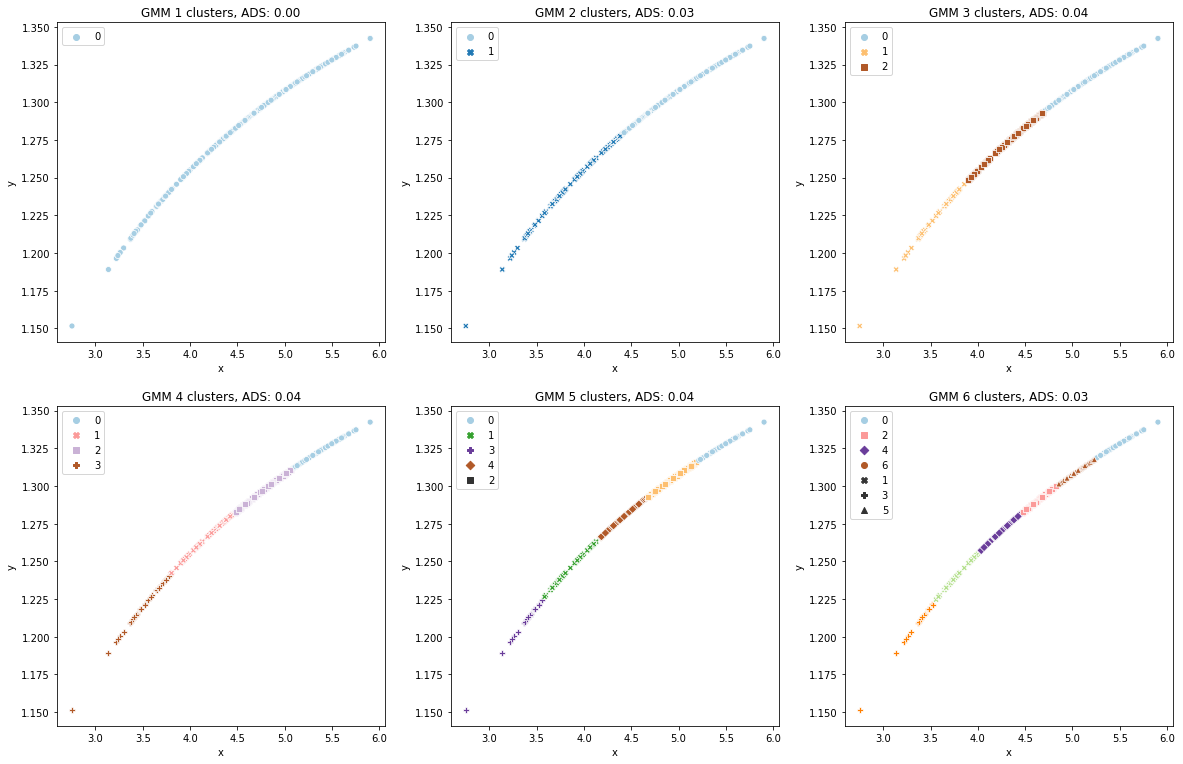

In [8]:
plt.figure(figsize=(20,20))

best_adi_gaus = 0

for i in range(1,lengh+2):
    kmean_cluster = GaussianMixture(n_components=i, random_state=2)
    kmean_cluster.fit(df_data)
    km_target = kmean_cluster.predict(df_data)
    score_ads = adjusted_rand_score(df_target, km_target)
    comp_list = ["Cluster "+str(i) for i in range(1,i)]
    plt.subplot(3,int((lengh/2)+1),i)
    #plt.scatter(df_data["x"], df_data["y"], label=comp_list, color = colors[i-1])
    sb.scatterplot(x="x", y="y", data=df_data, hue=km_target, palette="Paired", style=km_target)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("GMM {:0.0f} clusters, ADS: {:0.2f}".format(i, score_ads))
    if score_ads>best_adi_gaus:
        best_adi_gaus=score_ads
        n_clust_gaus = i
print("Best ADS: {:0.2f} for {:0.0f} number of clusters".format(best_adi_gaus, n_clust_gaus))

## Zbiór 3

Text(0.5, 1.0, 'Generated Data moons, moons 2')

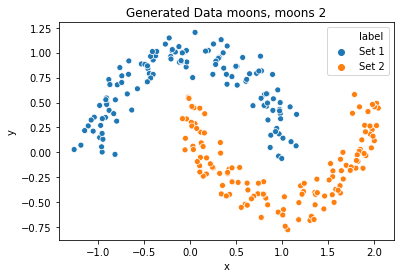

In [9]:
X, y = make_moons(n_samples=250, noise=0.1)
y_names = ["Set "+str(i+1) for i in y]

df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y_names))

#fig, ax = plt.subplots()
#grouped = df.groupby('label')
#for key, group in grouped:
    #group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=data_sety[key])
#plt.show()
#df.columns

sb.scatterplot(x="x", y="y", data=df[["x", "y"]], hue = df["label"])
plt.title("Generated Data moons, moons {:0.0f}".format(len(set(y_names))))

2
Best ADS: 0.24 for 2 number of clusters


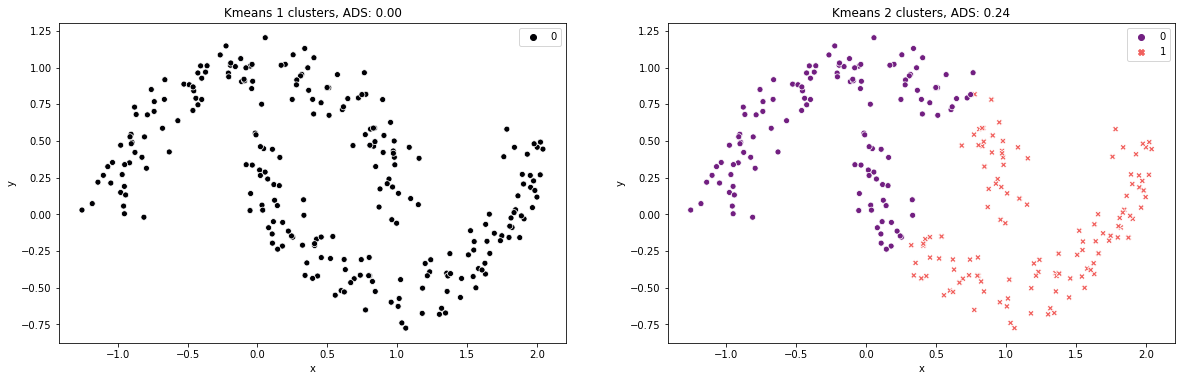

In [10]:
df_data = df[["x", "y"]]
df_target = df["label"]
lengh = len(set(df_target))
print(lengh)
best_adi = 0

plt.figure(figsize=(20,20))
for i in range(1,lengh+1):
    kmean_cluster = KMeans(n_clusters=i, random_state=2)
    kmean_cluster.fit(df_data)
    km_target = kmean_cluster.predict(df_data)
    score_ads = adjusted_rand_score(df_target, km_target)
    comp_list = ["Cluster "+str(i) for i in range(1,i)]
    plt.subplot(3,int((lengh/2)+1),i)
    #plt.scatter(df_data["x"], df_data["y"], label=comp_list, color = colors[i-1])
    sb.scatterplot(x="x", y="y", data=df_data, hue=km_target, palette="magma", style=km_target)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Kmeans {:0.0f} clusters, ADS: {:0.2f}".format(i, score_ads))
    if score_ads>best_adi:
        best_adi=score_ads
        n_clust = i
print("Best ADS: {:0.2f} for {:0.0f} number of clusters".format(best_adi, n_clust))

Best ADS: 0.48 for 2 number of clusters


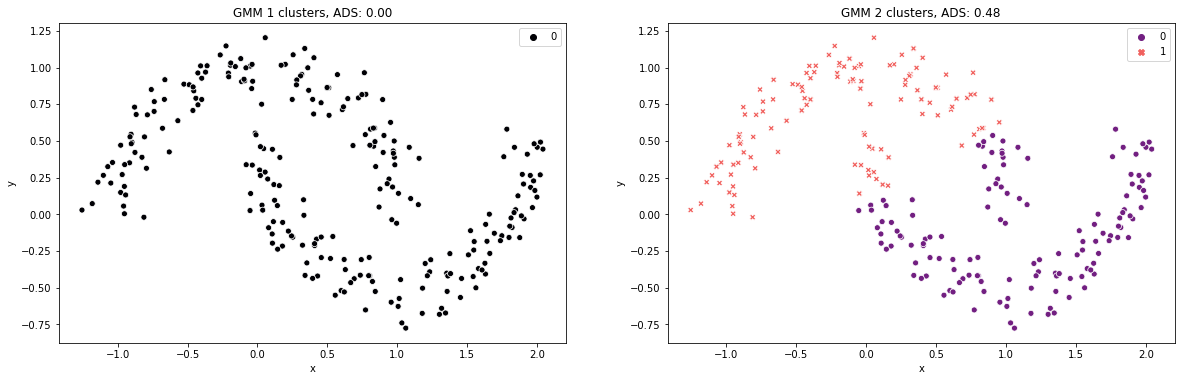

In [11]:
plt.figure(figsize=(20,20))

best_adi_gaus = 0

for i in range(1,lengh+1):
    kmean_cluster = GaussianMixture(n_components=i, random_state=2, covariance_type='full')
    kmean_cluster.fit(df_data)
    km_target = kmean_cluster.predict(df_data)
    score_ads = adjusted_rand_score(df_target, km_target)
    comp_list = ["Cluster "+str(i) for i in range(1,i)]
    plt.subplot(3,int((lengh/2)+1),i)
    #plt.scatter(df_data["x"], df_data["y"], label=comp_list, color = colors[i-1])
    sb.scatterplot(x="x", y="y", data=df_data, hue=km_target, palette="magma", style=km_target)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("GMM {:0.0f} clusters, ADS: {:0.2f}".format(i, score_ads))
    if score_ads>best_adi_gaus:
        best_adi_gaus=score_ads
        n_clust_gaus = i
print("Best ADS: {:0.2f} for {:0.0f} number of clusters".format(best_adi_gaus, n_clust_gaus))

Best ADS: 0.48 for 2 number of clusters


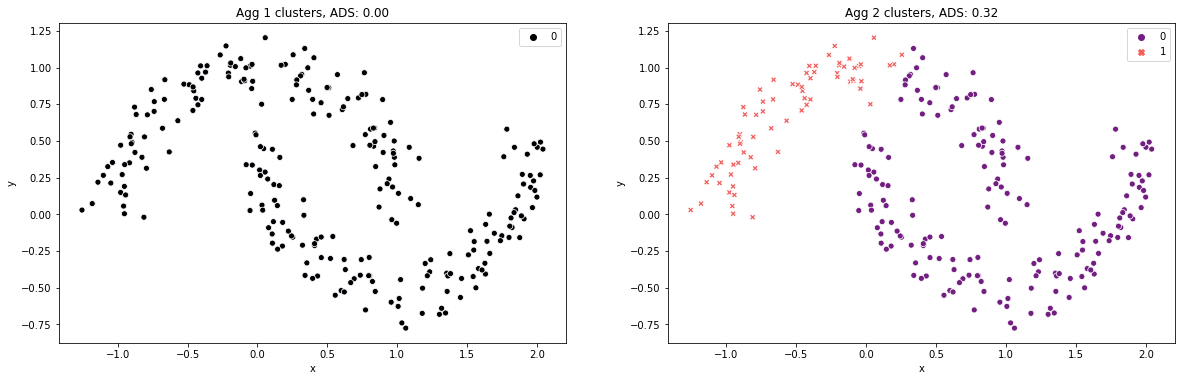

In [12]:
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize=(20,20))
for i in range(1,lengh+1):
    agg = AgglomerativeClustering(n_clusters=i, linkage="complete")
    agg.fit(df_data)
    km_target = agg.fit_predict(df_data)
    score_ads = adjusted_rand_score(df_target, km_target)
    comp_list = ["Cluster "+str(i) for i in range(1,i)]
    plt.subplot(3,int((lengh/2)+1),i)
    #plt.scatter(df_data["x"], df_data["y"], label=comp_list, color = colors[i-1])
    sb.scatterplot(x="x", y="y", data=df_data, hue=km_target, palette="magma", style=km_target)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Agg {:0.0f} clusters, ADS: {:0.2f}".format(i, score_ads))
    if score_ads>best_adi_gaus:
        best_adi_gaus=score_ads
        n_clust_gaus = i
print("Best ADS: {:0.2f} for {:0.0f} number of clusters".format(best_adi_gaus, n_clust_gaus))


## Zbiór 4


Index(['x', 'y', 'label'], dtype='object')


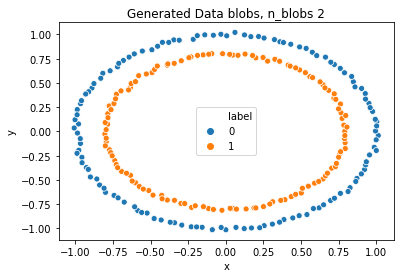

In [13]:
X, y = make_circles(n_samples=250, noise=0.01)
y_names = ["Set "+str(i+1) for i in y]

df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

#fig, ax = plt.subplots()
#grouped = df.groupby('label')
#for key, group in grouped:
    #group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=data_sety[key])
#plt.show()
#df.columns

sb.scatterplot(x="x", y="y", data=df[["x", "y"]], hue = df["label"])
plt.title("Generated Data blobs, n_blobs {:0.0f}".format(len(set(y_names))))

print(df.columns)

2
Best ADS: 1.00


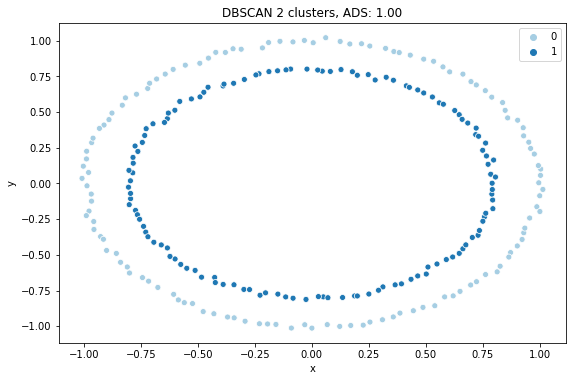

In [14]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN

df_data = df[["x", "y"]]
df_target = df["label"]
lengh = len(set(df_target))
print(lengh)
best_adi = 0

agg = DBSCAN(eps=0.1, min_samples=2, metric='euclidean', algorithm = "brute")
agg.fit(df_data)
km_target = agg.fit_predict(df_data)
score_ads = adjusted_rand_score(df_target, km_target)
comp_list = ["Cluster "+str(i) for i in range(1,i)]
plt.figure(figsize=(20,20))
plt.subplot(3,int((lengh/2)+1),i)
#plt.scatter(df_data["x"], df_data["y"], label=comp_list, color = colors[i-1])
sb.scatterplot(x="x", y="y", data=df_data, hue=km_target, palette="Paired")
plt.xlabel("x")
plt.ylabel("y")
plt.title("DBSCAN 2 clusters, ADS: {:0.2f}".format(score_ads))
if score_ads>best_adi:
    best_adi=score_ads
    n_clust = i
print("Best ADS: {:0.2f}".format(best_adi))

Best ADS: 0.00 for 2 number of clusters


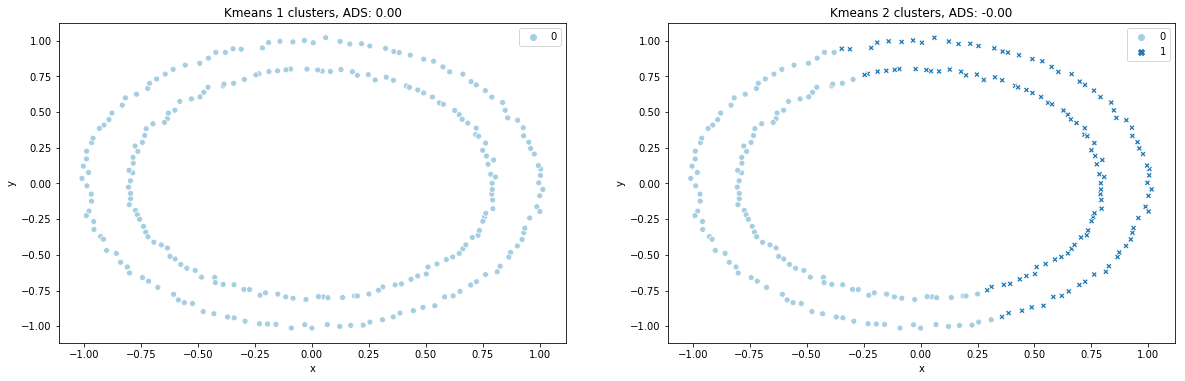

In [15]:
df_data = df[["x", "y"]]
df_target = df["label"]
lengh = len(set(df_target))
best_adi = 0

plt.figure(figsize=(20,20))
for i in range(1,lengh+1):
    kmean_cluster = GaussianMixture(n_components=i, random_state=2)
    kmean_cluster.fit(df_data)
    km_target = kmean_cluster.fit_predict(df_data)
    score_ads = adjusted_rand_score(df_target, km_target)
    comp_list = ["Cluster "+str(i) for i in range(1,i)]
    plt.subplot(3,int((lengh/2)+1),i)
    #plt.scatter(df_data["x"], df_data["y"], label=comp_list, color = colors[i-1])
    sb.scatterplot(x="x", y="y", data=df_data, hue=km_target, palette="Paired", style=km_target)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Kmeans {:0.0f} clusters, ADS: {:0.2f}".format(i, score_ads))
    if score_ads>best_adi:
        best_adi=score_ads
        n_clust = i
print("Best ADS: {:0.2f} for {:0.0f} number of clusters".format(best_adi, n_clust))


# Zadanie nr 2
* Przeprowadzić generowanie wiekszej ilości danych na zbiorze https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [16]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
dataset.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

In [17]:
df_2_data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df_2_target = pd.Series(dataset.target)
df_2_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### PCA aby zrobic lepszy klasyfikator - w celach porównawczych dla wygenerowanych danych

In [18]:
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

kmo_all,kmo_model=calculate_kmo(df_2_data)
print(kmo_model)
chi_square_value, p_value =calculate_bartlett_sphericity(df_2_data)
print(chi_square_value, p_value)

0.8317335254097401
39391.522783629975 0.0


Explained variance: 0.9864881227123623
suma wariancji: 0.9864881227123623


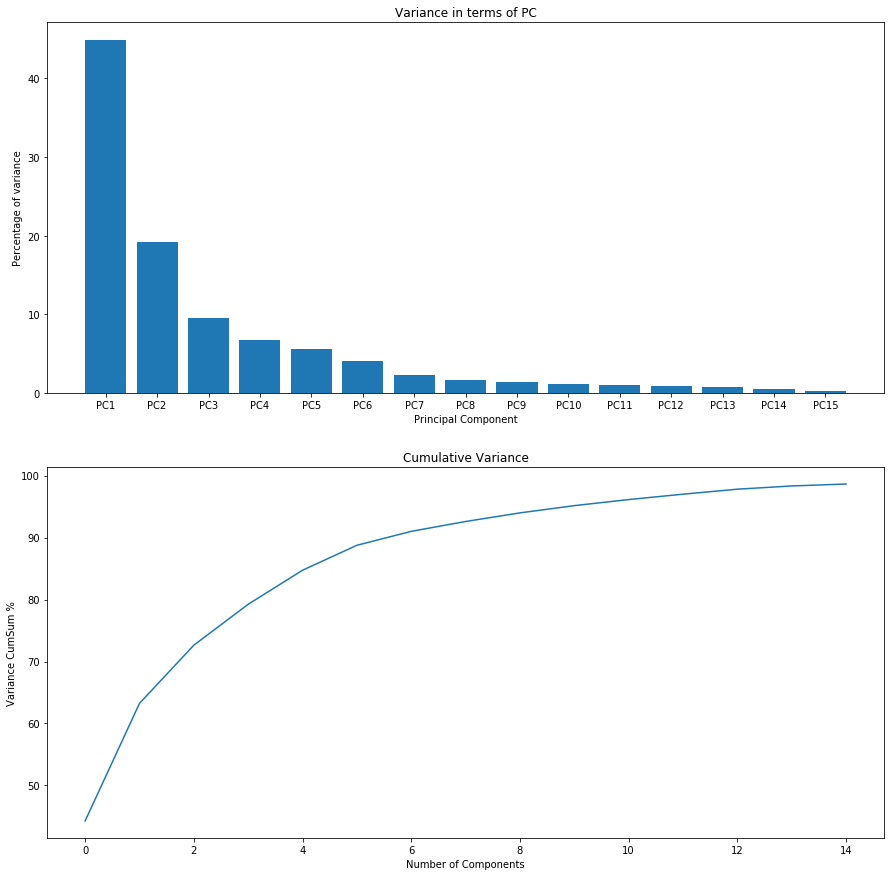

In [19]:
scaller = StandardScaler()
scalled_data = scaller.fit_transform(df_2_data.values)

#num_components = len(df_2_data.columns)
num_components = 15
pca = PCA(n_components=num_components, random_state=2)
transformed_data = pca.fit_transform(scalled_data)
data_variance = pca.explained_variance_

data_variance2 = pca.explained_variance_ratio_
sum_ex = 0
for i in data_variance2:
    sum_ex += i
#print(f"variance ratio: {data_variance2}")
print(f"Explained variance: {sum_ex}")

suma =0
a = 0
while a != num_components:
    suma += data_variance2[a]
    a+=1
print(f"suma wariancji: {suma}")
ex_variance = np.var(transformed_data, axis=0)
ex_variance_ratio = ex_variance*100/np.sum(ex_variance)
iterator_list = 0
cumul_variance =0

while iterator_list<num_components:
    cumul_variance+=ex_variance_ratio[iterator_list]
    iterator_list+=1

comp_labels =["PC"+str(i) for i in range(1, num_components+1)]


plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
plt.bar(x=range(1,num_components+1), height=ex_variance_ratio, tick_label=comp_labels)
plt.ylabel("Percentage of variance")
plt.xlabel("Principal Component")
plt.title("Variance in terms of PC")

plt.subplot(2,1,2)
plt.plot(np.cumsum(data_variance2)*100)
plt.xlabel("Number of Components")
plt.ylabel("Variance CumSum %")
plt.title("Cumulative Variance")
plt.show()


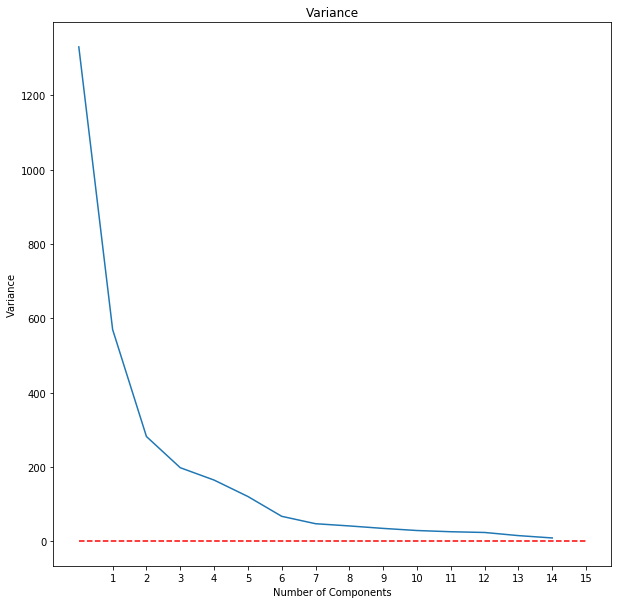

In [20]:
one = [1 for i in range(0,num_components+1)]

plt.figure(figsize=(10,10))
plt.plot(data_variance*100)
plt.plot(range(0,num_components+1), one, "r--")
plt.xticks(range(1,num_components+1,1))
plt.xlabel("Number of Components")
plt.ylabel("Variance")
plt.title("Variance")
plt.show()

<Figure size 3600x3600 with 0 Axes>

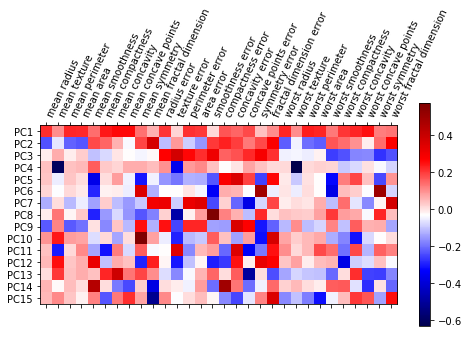

(15, 30)


In [21]:
comp_labels =["PC"+str(i) for i in range(1, len(data_variance2)+1)]

plt.figure(figsize=(50,50))
plt.matshow(pca.components_, cmap="seismic")
plt.yticks([i for i in range(len(comp_labels))], comp_labels, fontsize=10)
plt.colorbar()
plt.xticks(range(len(df_2_data.columns)), df_2_data.columns,
           rotation=65, ha="left")
#for i in range(np.shape(pca.components_)[0]):
    #for j in range(np.shape(pca.components_)[1]):
        #plt.text(j,i, round(pca.components_[i,j],3), ha="center", va="center", color="k")
#plt.tight_layout()
plt.show()
### results data
print(np.shape(pca.components_))

In [22]:
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, train_test_split

classifiers = {"XGB" : XGBClassifier(random_state=2), 
               "SVC" : SVC(random_state=2, gamma='scale'), 
               "Logistic" : LogisticRegression(random_state=2, solver='lbfgs'),
               "Random Forest" : RandomForestClassifier(random_state=2, n_estimators=100),
               "KNN" : KNeighborsClassifier(),
               "Bayes" : GaussianNB()
              }

best_score = 0
best_model = None
model_dict = {}

for key, item in classifiers.items():
    model = Pipeline([
        ("scaller", StandardScaler()),
        ("pca", PCA(n_components=num_components, random_state=2)),
        ("classfier", item)
    ])
    X_train, X_test, y_train, y_test = train_test_split(df_2_data.values, df_2_target, random_state=2, test_size =0.2)
    cross_val = cross_val_score(model, X_train, y_train, cv=5)
    print("Model: score: %0.3f (+/- %0.2f), Estimator: %s" % (cross_val.mean(), 2 * cross_val.std(), key))
    
    if cross_val.mean()>best_score:
        best_score = cross_val.mean()
        best_model = key
        best_class = item
model_dict[best_model] = best_class
print("Best model: %s" % (best_model))

Model: score: 0.965 (+/- 0.04), Estimator: XGB
Model: score: 0.978 (+/- 0.03), Estimator: SVC
Model: score: 0.978 (+/- 0.01), Estimator: Logistic
Model: score: 0.934 (+/- 0.05), Estimator: Random Forest
Model: score: 0.967 (+/- 0.04), Estimator: KNN
Model: score: 0.903 (+/- 0.03), Estimator: Bayes
Best model: Logistic


### Bez PCA -> tylko dla testu

In [23]:
for key2, item in classifiers.items():
    model = Pipeline([
        ("scaller", StandardScaler()),
        ("classfier", item)
    ])
    X_train, X_test, y_train, y_test = train_test_split(df_2_data.values, df_2_target, random_state=2, test_size =0.2)
    cross_val = cross_val_score(model, X_train, y_train, cv=5)
    print("Model: score: %0.3f (+/- %0.2f), Estimator: %s" % (cross_val.mean(), 2 * cross_val.std(), key2))
    
    if cross_val.mean()>best_score:
        best_score = cross_val.mean()
        best_model = key2
        #model_dict[key] = item
print("Best model: %s" % (best_model))

Model: score: 0.971 (+/- 0.06), Estimator: XGB
Model: score: 0.976 (+/- 0.04), Estimator: SVC
Model: score: 0.978 (+/- 0.01), Estimator: Logistic
Model: score: 0.956 (+/- 0.05), Estimator: Random Forest
Model: score: 0.963 (+/- 0.03), Estimator: KNN
Model: score: 0.925 (+/- 0.05), Estimator: Bayes
Best model: Logistic


## Zadanie nr 2 częsć wlsciwa :)

In [24]:

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_2_data.values, df_2_target, test_size=0.2, random_state=2)
model_logistic = Pipeline([
        ("scaller", StandardScaler()),
        ("pca", PCA(n_components=num_components, random_state=2)),
        ("classfier", model_dict[best_model])])

#fiting testing model
model_logistic.fit(X_train_2, y_train_2)
orginal_cv = cross_val_score(model_logistic,X_train_2, y_train_2, cv=5)
orginal_score = model_logistic.score(X_test_2, y_test_2)


#fiting GMM
GMM_model = GaussianMixture(n_components=len(set(df_2_target)), random_state=0).fit(X_train)
X_generated, y_generated = GMM_model.sample(1500)

## predicting new samples GMM
ADS = adjusted_rand_score(y_test_2, GMM_model.predict(X_test_2))
y_target = GMM_model.predict(X_test_2)

##Checking model on generated data

model_logistic2 = Pipeline([
        ("scaller", StandardScaler()),
        ("pca", PCA(n_components=num_components, random_state=2)),
        ("classfier", model_dict[best_model])])
model_logistic2.fit(X_generated, y_generated)
generated_cv = cross_val_score(model_logistic2, X_generated, y_generated, cv=5)
generated_score = model_logistic2.score(X_test_2, y_target)

print("Orginal model score: {:0.3f}, cross val: {:0.3f} (+/- {:0.3f})"
      .format(orginal_score, orginal_cv.mean(), 2*orginal_cv.std()))
print("Generated model score: {:0.3f}, cross val: {:0.3f} (+/- {:0.3f})"
      .format(generated_score, generated_cv.mean(), 2*generated_cv.std()))


Orginal model score: 0.965, cross val: 0.978 (+/- 0.014)
Generated model score: 0.956, cross val: 0.963 (+/- 0.022)
